# Prosper Loan Data Exploration
## by Yao Liu

## Dataset Overview

This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv("prosperLoanData.csv")
# select relevant columns
df=df[["CreditGrade","ProsperRating (Alpha)","Term","BorrowerRate","EmploymentStatus","CreditScoreRangeLower","CreditScoreRangeUpper","IncomeRange","LoanOriginalAmount"]]
# print statistics
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CreditGrade            28953 non-null   object 
 1   ProsperRating (Alpha)  84853 non-null   object 
 2   Term                   113937 non-null  int64  
 3   BorrowerRate           113937 non-null  float64
 4   EmploymentStatus       111682 non-null  object 
 5   CreditScoreRangeLower  113346 non-null  float64
 6   CreditScoreRangeUpper  113346 non-null  float64
 7   IncomeRange            113937 non-null  object 
 8   LoanOriginalAmount     113937 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 7.8+ MB
None


In [3]:
# credit rating is stored in two columns - ProsperRating (Alpha) & CreditGrade, need to combine
# change nulls to empty string
df["ProsperRating (Alpha)"].replace(np.nan, '', inplace=True)
df["CreditGrade"].replace(np.nan, '', inplace=True)
# concat the values in the two columns
df["Rating"]=df["ProsperRating (Alpha)"]+df["CreditGrade"]
# since there is no overlap in the two columns, we only need to change the empty cells to nulls
df["Rating"].replace('', np.nan, inplace=True)
# drop columns ProsperRating (Alpha) & CreditGrade
df.drop(["ProsperRating (Alpha)","CreditGrade"],axis=1,inplace=True)

In [4]:
# credit score range has two columns - CreditScoreRangeLower & CreditScoreRangeUpper
# we can calculate the mean and store it in a new variable
df["CreditScore"]=(df.CreditScoreRangeLower+df.CreditScoreRangeUpper)/2
# drop columns CreditScoreRangeLower & CreditScoreRangeUpper
df.drop(["CreditScoreRangeLower","CreditScoreRangeUpper"],axis=1,inplace=True)

In [5]:
# change income range to "$0" for those not displayed and not employed
df["IncomeRange"].replace(["Not displayed","Not employed"],"$0",inplace=True)

In [6]:
# drop rows with nulls to remove any missing values
df.dropna(inplace=True)

In [7]:
# convert IncomeRange and Rating into ordered categorical types
ordinal_var_dict = {'IncomeRange': ["$0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"],
                    'Rating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [8]:
# print statistics of the cleaned dataframe
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111549 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Term                111549 non-null  int64   
 1   BorrowerRate        111549 non-null  float64 
 2   EmploymentStatus    111549 non-null  object  
 3   IncomeRange         111549 non-null  category
 4   LoanOriginalAmount  111549 non-null  int64   
 5   Rating              111450 non-null  category
 6   CreditScore         111549 non-null  float64 
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 5.3+ MB
None
                Term   BorrowerRate  LoanOriginalAmount    CreditScore
count  111549.000000  111549.000000       111549.000000  111549.000000
mean       40.933868       0.192945         8418.256004     696.351518
std        10.522771       0.074860         6258.495193      64.384143
min        12.000000       0.000000         1000.000000       9.500

### What is the structure of your dataset?

There are 107,356 loans in the dataset with 7 features (Term, BorrowerRate, EmploymentStatus, IncomeRange, LoanOriginalAmount, Rating, and CreditScore). Some variables are numeric in nature, but most variables are categorical, especially IncomeRange and Rating are ordered factor variables with the following levels. 
(worst) ——> (best) 

IncomeRange: "0","1-24,999","25,000-49,999","50,000-74,999","75,000-99,999","100,000+"

Rating: 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the BorrowerRate of the loans in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that CreditScore will have strong effect on each loan's rate: the higher the credit score, the lower the rate. I also think that the other 3 features of loans: Term, Rating, and IncomeRange, will have effects on the loan's rate, though to a much smaller degree than the main effect of CreditScore.

## Univariate Exploration

First, I'll look at the distribution of the main variable of interest: BorrowerRate.

Text(0.5, 1.0, 'Borrower Rate Distribution')

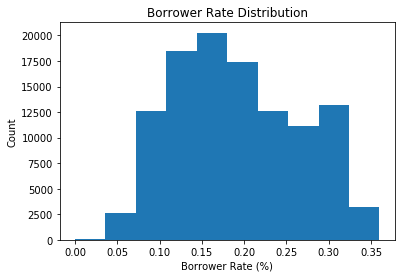

In [9]:
plt.hist(df.BorrowerRate)
plt.xlabel("Borrower Rate (%)")
plt.ylabel("Count")
plt.title("Borrower Rate Distribution")

The BorrowerRate is ranging from 0 to 0.36, with an approximately normal distribution.

Second, I'll look at the first predictor variable of interest: CreditScore.

(array([1.0100e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.0000e+00,
        4.0500e+02, 1.9090e+03, 2.5600e+03, 4.5150e+03, 1.6049e+04,
        4.8032e+04, 2.2033e+04, 1.1143e+04, 4.0060e+03, 7.9000e+02]),
 array([  9.5,  53.5,  97.5, 141.5, 185.5, 229.5, 273.5, 317.5, 361.5,
        405.5, 449.5, 493.5, 537.5, 581.5, 625.5, 669.5, 713.5, 757.5,
        801.5, 845.5, 889.5]),
 <a list of 20 Patch objects>)

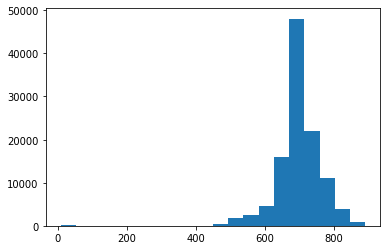

In [10]:
plt.hist(df.CreditScore,bins=20)

Most of the data is set to the right of their axes, suggesting some outliers on the left. I'll identify these outliers and see if they need to be filtered out of the data.

In [11]:
# check on the low outliers
df[df['CreditScore'] < 400].CreditScore.value_counts()

9.5      101
369.5      1
Name: CreditScore, dtype: int64

There are 2 outliers with CreditScore of 9.5, this seems like a default credit score in the system. Since the population of outlier is relatively small compared to the total population, we can drop these rows from the dataset.

(array([  147.,   677.,  2795.,  5775., 16049., 32647., 37418., 11143.,
         4006.,   790.]),
 array([429.5, 475.5, 521.5, 567.5, 613.5, 659.5, 705.5, 751.5, 797.5,
        843.5, 889.5]),
 <a list of 10 Patch objects>)

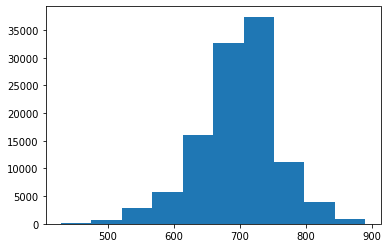

In [12]:
# drop low outliers
df=df[df['CreditScore'] >= 400]
# re-plot the distribution of CreditScore
plt.hist(df.CreditScore)

Lastly, I'll look at the other 3 feathers that we are interested in: Term, Rating, and IncomeRange

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

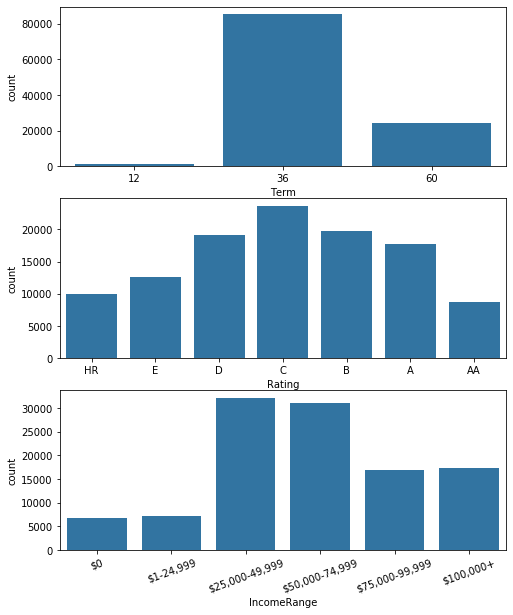

In [13]:
# plot all three variables together
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'Rating', color = default_color, ax = ax[1])
sb.countplot(data = df, x = 'IncomeRange', color = default_color, ax = ax[2])
plt.xticks(rotation=20)

The majority of loans is 36 years term loan. More loans fall under middle range of rating and income than the lower range and higher range.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are outliers in CreditScore, they are removed from the dataframe.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I combined the rating before July 2009 and after into one column, so it is easier to analyze the relationship with other variables. In addition, I took the mean of credit score lower and upper range as one credit score variable, this is also for the convenience of further analysis. Furthermore, I changed income range to "0" for those "not displayed" and "not employed". Then I converted IncomeRange and Rating into ordered categorical types. This is to make further visualization cleaner and easier to follow.

## Bivariate Exploration

First, I'll look at the pairwise correlations between numeric variables that I'm interested in the data.

In [14]:
numeric_vars = ["BorrowerRate","CreditScore","LoanOriginalAmount"]
categoric_vars = ["Term","IncomeRange","Rating"]

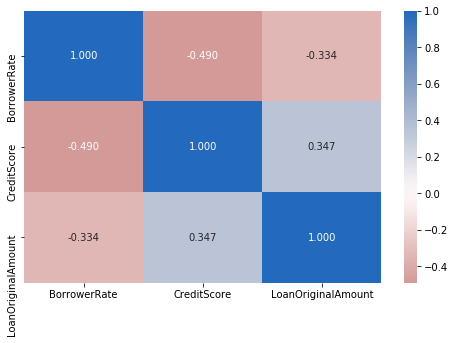

In [15]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

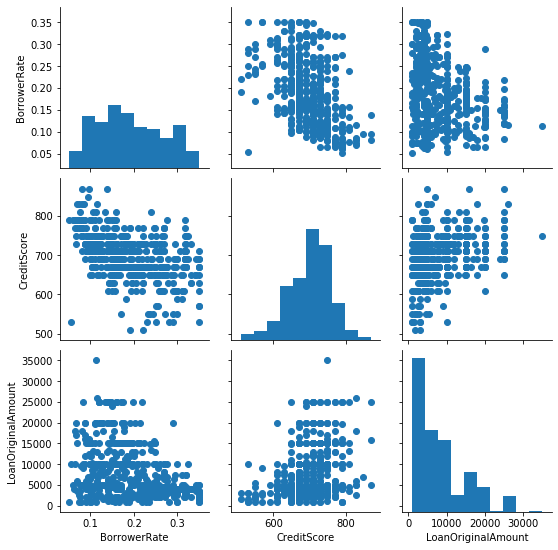

In [16]:
# sample 500 loans so that plots are clearer
df_samp = df.sample(n=500,replace=False,random_state=42)
g=sb.PairGrid(data=df_samp, vars=numeric_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

It seems credit score and loan original amount have negative relationship with borrower rate. But the relationships are not very strong.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

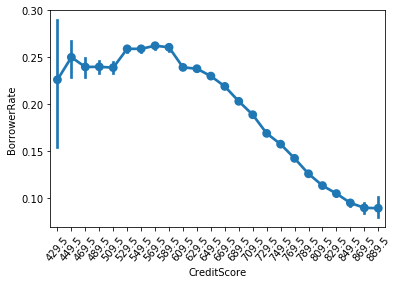

In [17]:
# another way to explore relationship between CreditScore and BorrowerRate
# plot mean BorrowerRate for each CreditScore
sb.pointplot(data=df,x="CreditScore",y="BorrowerRate")
plt.xticks(rotation=50)

We can see that borrowers with higher credit scores can get lower rate on average, vice versa. 

Second, I'll look at the relationship between BorrowerRate and the three categorical variables.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

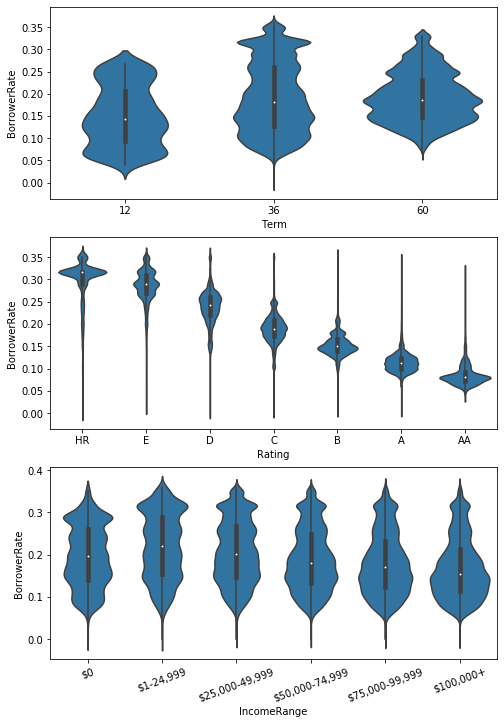

In [18]:
# plot the three categorical variables against BorrowerRate
fig, ax = plt.subplots(nrows=3, figsize = [8,12])
default_color = sb.color_palette()[0]
sb.violinplot(data=df,x="Term",y="BorrowerRate",color = default_color, ax = ax[0])
sb.violinplot(data=df,x="Rating",y="BorrowerRate",color = default_color, ax = ax[1])
sb.violinplot(data=df,x="IncomeRange",y="BorrowerRate",color = default_color, ax = ax[2])
plt.xticks(rotation=20)

In the Term chart, loans with longer term have higher median borrower rate. In the Rating chart, it is very obvious that higher rating comes with lower borrower rate. In the IncomeRange chart, we can also see that higher income range tend to have more loans with low borrower rate.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

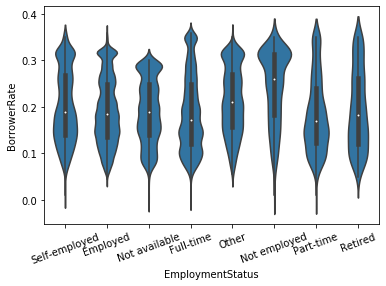

In [19]:
# out of curiousity, I want to take a look at relationsip between EmploymentStatus and BorrowerRate
sb.violinplot(data=df,x="EmploymentStatus",y="BorrowerRate",color = default_color)
plt.xticks(rotation=20)

Not employed borrowers have higher rate than other type of borrowers.

Lastly, I'll look at the relationship between the three categorical variables.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

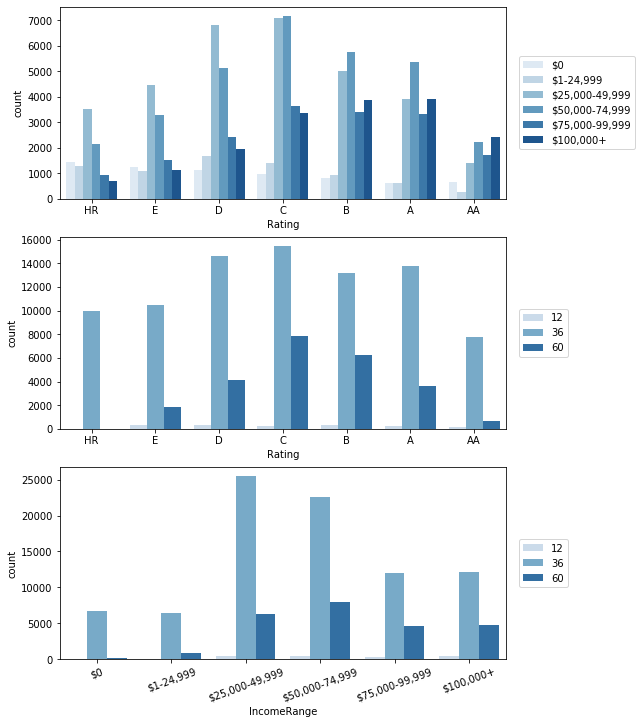

In [20]:
# create subplots to compare side by side
plt.figure(figsize = [8, 12])
# subplot 1: Rating vs IncomeRange
plt.subplot(3, 1, 1)
g0=sb.countplot(data = df, x = 'Rating', hue = 'IncomeRange', palette = 'Blues')
g0.legend(loc='right', bbox_to_anchor=(1.3, 0.5), ncol=1)
# subplot 2: Rating vs Term
plt.subplot(3, 1, 2)
g1=sb.countplot(data = df, x = 'Rating', hue = 'Term', palette = 'Blues')
g1.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
# subplot 3: IncomeRange vs Term
plt.subplot(3, 1, 3)
g2=sb.countplot(data = df, x = 'IncomeRange', hue = 'Term', palette = 'Blues')
g2.legend(loc='right', bbox_to_anchor=(1.15, 0.5), ncol=1)
plt.xticks(rotation=20)

In the first chart, we can see that higher income range borrowers are more than the lower income range ones in the AA rating group. In the other rating groups, majority tend to be in the middle income range. This aligns with the distribution of IncomeRange. In the following charts, distributions between different Terms are similar, but we can still see that the majority of 60 years term loans fall under higher income range compared to the majority of 36 years term loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I noticed that borrowers with higher credit scores tend to have lower rate on average. Similarly, higher loan original amount also tend to get lower rate on average. Also, loans with longer term or lower rating and borrowers with lower income range tend to have higher median borrower rate. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I found not employed borrowers have higher rate than other type of borrowers. This makes sense because not employed borrowers are more likely to default, so a higher rate is required for the high risk.

## Multivariate Exploration

I would like to further look at how the three categorical variables play into the relationship between CreditScore and BorrowerRate.

C:\Users\yliu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


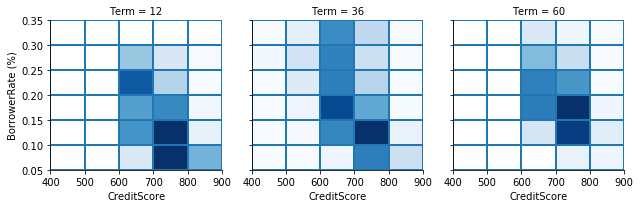

In [21]:
# create faceted heat maps on levels of the Term variable
g = sb.FacetGrid(data = df, col = 'Term', col_wrap = 3, size = 3)
bins_x = np.arange(400, 900+1, 100)
bins_y = np.arange(0.05, 0.35+.05, .05)
g.map(plt.hist2d, 'CreditScore', 'BorrowerRate', bins=[bins_x,bins_y],cmap = 'Blues', cmin = 0.5)
g.set_xlabels('CreditScore')
g.set_ylabels('BorrowerRate (%)')

As the loan's term increasing, the darker cells (with more loans) moves upper, this is showing increased borrower rates.

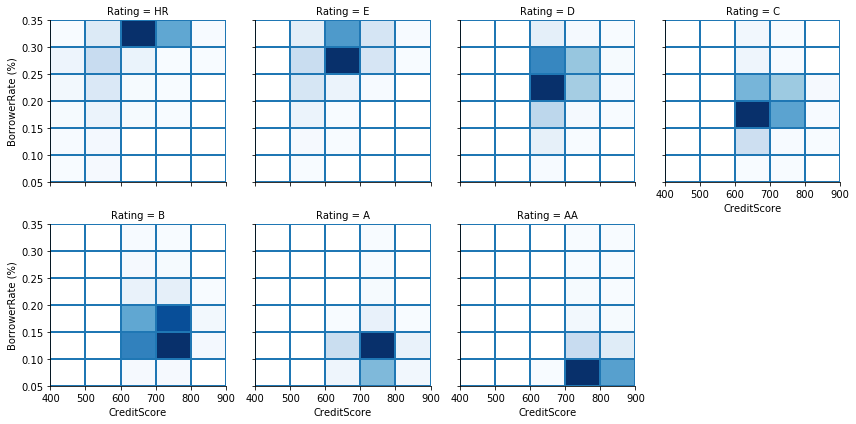

In [22]:
# create faceted heat maps on levels of the Term variable
g = sb.FacetGrid(data = df, col = 'Rating', col_wrap = 4, size = 3)
bins_x = np.arange(400, 900+1, 100)
bins_y = np.arange(0.05, 0.35+.05, .05)
g.map(plt.hist2d, 'CreditScore', 'BorrowerRate', bins=[bins_x,bins_y],cmap = 'Blues', cmin = 0.5)
g.set_xlabels('CreditScore')
g.set_ylabels('BorrowerRate (%)')

As the loan's rating increasing, the darker cells (with more loans) moves lower to the right bottom, this is showing decreased borrower rates but increased credit score.

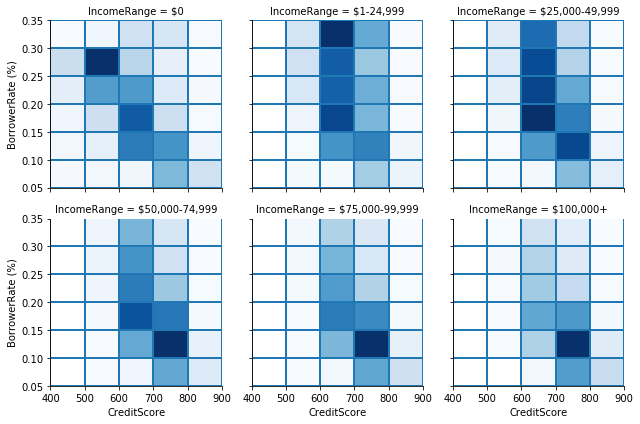

In [23]:
# create faceted heat maps on levels of the Term variable
g = sb.FacetGrid(data = df, col = 'IncomeRange', col_wrap = 3, size = 3)
bins_x = np.arange(400, 900+1, 100)
bins_y = np.arange(0.05, 0.35+.05, .05)
g.map(plt.hist2d, 'CreditScore', 'BorrowerRate', bins=[bins_x,bins_y],cmap = 'Blues', cmin = 0.5)
g.set_xlabels('CreditScore')
g.set_ylabels('BorrowerRate (%)')

As the borrower's income increasing, the darker cells (with more loans) moves lower to the right bottom, this is showing decreased borrower rates but increased credit score too.

In [24]:
# select loans of approximately 650 credit score
df_650=df.query("CreditScore>649 & CreditScore<650")
# select loans of approximately 730 credit score
df_730=df.query("CreditScore>729 & CreditScore<730")

Text(0, 0.5, 'Borrower Rate (%)')

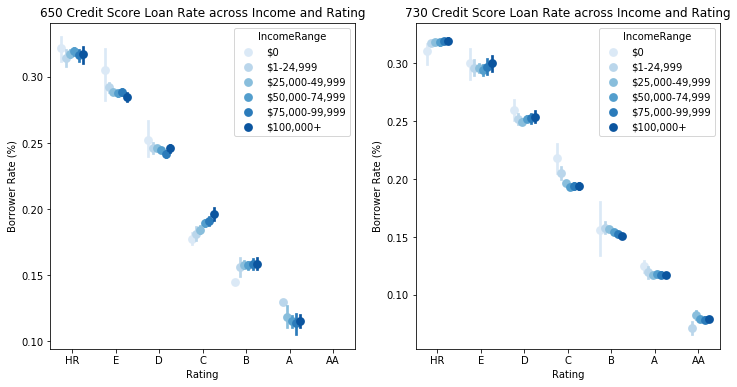

In [25]:
# plot 675 Credit Score vs. 775 Credit Score Loan Rate across Income and Credit Rating
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
ax[0]=sb.pointplot(data = df_650, x = 'Rating', y = 'BorrowerRate', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge =0.5,ax = ax[0])
ax[0].set_title('650 Credit Score Loan Rate across Income and Rating')
ax[0].set_ylabel('Borrower Rate (%)')
ax[1]=sb.pointplot(data = df_730, x = 'Rating', y = 'BorrowerRate', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge =0.5,ax = ax[1])
ax[1].set_title('730 Credit Score Loan Rate across Income and Rating')
ax[1].set_ylabel('Borrower Rate (%)')

The point plot for borrowers with about 730 credit score shows the clear influence of Rating and IncomeRange on BorrowerRate. Across all rating grades, higher income range tend to have lower rate. However, the plot is less clear for the lower borrower credit score like around 650. It is interesting that higher income borrowers are generally getting higher rate than the lower income borrowers, especially for loans with mid high rating like B or C, but this is hard to explain in real world.

Text(0, 0.5, 'Borrower Rate (%)')

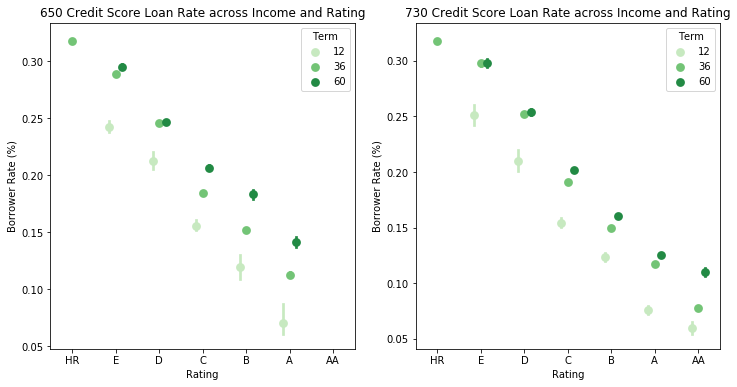

In [26]:
# plot 650 Credit Score vs. 730 Credit Score Loan Rate across Term and Credit Rating
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])
ax[0]=sb.pointplot(data = df_650, x = 'Rating', y = 'BorrowerRate', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge =0.3,ax = ax[0])
ax[0].set_title('650 Credit Score Loan Rate across Income and Rating')
ax[0].set_ylabel('Borrower Rate (%)')
ax[1]=sb.pointplot(data = df_730, x = 'Rating', y = 'BorrowerRate', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge =0.3,ax = ax[1])
ax[1].set_title('730 Credit Score Loan Rate across Income and Rating')
ax[1].set_ylabel('Borrower Rate (%)')

From the point plots for borrowers with around 650 and 730 credit score, we can see a clear influence of Rating and Term on BorrowerRate. With loans rating increasing, borrowers rate are generally decreasing no matter how long the term is. Also, longer term loans tend to have higher rate across all rating grades.   

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I further investigate the borrower rate against borrower credit score by looking at the impact of the three categorical features. The multivariate exploration above showed that there is obvious downward presure of increased rating grade on borrower rate. Controlling for the credit score of borrower shows clearer effect of the other categorical variables. This effect was clearest for the Rating and Term variables, with less systematic trends for IncomeRange.

### Were there any interesting or surprising interactions between features?

In one of the point plots, it shows that higher income borrowers are generally getting higher rate than the lower income borrowers under certain rating grades. There might be some other hidden factors that particular group of borrowers might share leading to this surprising interaction.

In [30]:
jupyter nbconvert Slide_Deck.ipynb --to slides --post serve --template output_toggle.tpl

SyntaxError: invalid syntax (<ipython-input-30-a91d91a46caa>, line 1)